In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Example
#Dataset
#https://raw.githubusercontent.com/adminho/machine-learning/master/Datasets/classification_2classes.csv
#https://www.kaggle.com/msjaiclub/2classclassification
df = pd.read_csv('https://raw.githubusercontent.com/adminho/machine-learning/master/Datasets/classification_2classes.csv')
df

,X,Y,Label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


<function matplotlib.pyplot.show(close=None, block=None)>

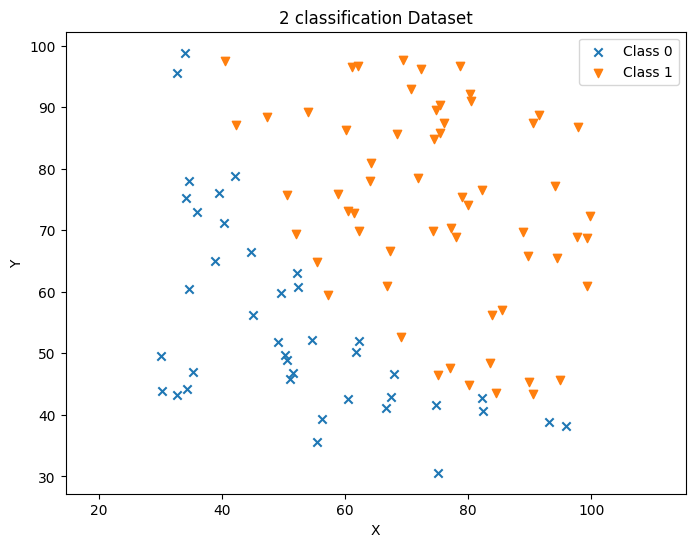

In [3]:
#Plot
group0 = df[df['Label']==0]
group1 = df[df['Label']==1]

plt.figure(figsize=(8,6))
plt.title('2 classification Dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.scatter(group0.X,group0.Y,marker = 'x',label = 'Class 0')
plt.scatter(group1.X,group1.Y,marker = 'v',label = 'Class 1')
plt.legend(loc='upper right')
plt.show

In [4]:
#Data preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

x = df[['X','Y']].values
y = df['Label'].values

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.1,random_state = 0)

In [5]:
# let's print the shape before we reshape and normalize
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

X_train shape (90, 2)
y_train shape (90,)
X_test shape (10, 2)
y_test shape (10,)


In [6]:
x_train.shape[1]

2

In [7]:
#Build neural network model
from keras.models import Sequential
from keras.layers import Dense, Conv2D,MaxPooling2D, Flatten

#create neural network-logistic model
modelNN_logistic = Sequential()
modelNN_logistic.add(Dense(1,input_shape=(x_train.shape[1],), activation='sigmoid'))
print('Neural network-logistic model')
modelNN_logistic.summary()
print('*'*100)


#create neural  model
modelNN = Sequential()
modelNN.add(Dense(10,input_shape=(x_train.shape[1],), activation='relu'))
modelNN.add(Dense(8, activation='relu'))
modelNN.add(Dense(5, activation='relu'))
modelNN.add(Dense(1, activation='sigmoid'))
print('Neural network model')
modelNN.summary()

Neural network-logistic model
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
****************************************************************************************************
Neural network model
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                30        
                                                                 
 dense_2 (Dense)             (None, 8)                 88        
                                                                 
 dense_3 (Dense)    

In [8]:
#compile model using accuracy to measure model performance
modelNN_logistic.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
modelNN.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])



In [9]:
#train the model
historyNN_logistic = modelNN_logistic.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=300,batch_size=1,verbose=1)

Epoch 1/300
90/90 [==============================] - 1s 4ms/step - loss: 0.6218 - accuracy: 0.6000 - val_loss: 0.6338 - val_accuracy: 0.6000
Epoch 2/300
90/90 [==============================] - 0s 3ms/step - loss: 0.6130 - accuracy: 0.6000 - val_loss: 0.6284 - val_accuracy: 0.6000
Epoch 3/300
90/90 [==============================] - 0s 3ms/step - loss: 0.6067 - accuracy: 0.6000 - val_loss: 0.6242 - val_accuracy: 0.6000
Epoch 4/300
90/90 [==============================] - 0s 4ms/step - loss: 0.6009 - accuracy: 0.6000 - val_loss: 0.6204 - val_accuracy: 0.6000
Epoch 5/300
90/90 [==============================] - 0s 4ms/step - loss: 0.5958 - accuracy: 0.6000 - val_loss: 0.6168 - val_accuracy: 0.6000
Epoch 6/300
90/90 [==============================] - 0s 4ms/step - loss: 0.5907 - accuracy: 0.6000 - val_loss: 0.6133 - val_accuracy: 0.6000
Epoch 7/300
90/90 [==============================] - 0s 4ms/step - loss: 0.5858 - accuracy: 0.6000 - val_loss: 0.6099 - val_accuracy: 0.6000
Epoch 8/300
9

In [10]:
historyNN = modelNN.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=300,batch_size=1,verbose=1)

Epoch 1/300
90/90 [==============================] - 1s 6ms/step - loss: 0.6390 - accuracy: 0.6000 - val_loss: 0.6753 - val_accuracy: 0.6000
Epoch 2/300
90/90 [==============================] - 0s 5ms/step - loss: 0.6123 - accuracy: 0.6000 - val_loss: 0.6534 - val_accuracy: 0.6000
Epoch 3/300
90/90 [==============================] - 0s 5ms/step - loss: 0.5862 - accuracy: 0.6111 - val_loss: 0.6377 - val_accuracy: 0.6000
Epoch 4/300
90/90 [==============================] - 0s 5ms/step - loss: 0.5545 - accuracy: 0.6556 - val_loss: 0.6223 - val_accuracy: 0.6000
Epoch 5/300
90/90 [==============================] - 0s 4ms/step - loss: 0.5234 - accuracy: 0.7444 - val_loss: 0.5923 - val_accuracy: 0.6000
Epoch 6/300
90/90 [==============================] - 0s 5ms/step - loss: 0.4825 - accuracy: 0.7889 - val_loss: 0.5819 - val_accuracy: 0.6000
Epoch 7/300
90/90 [==============================] - 0s 5ms/step - loss: 0.4575 - accuracy: 0.7889 - val_loss: 0.5307 - val_accuracy: 0.7000
Epoch 8/300
9

In [11]:
historyNN.history['loss']

[0.6389572620391846,
 0.6122807264328003,
 0.5861874222755432,
 0.5545269250869751,
 0.5234358310699463,
 0.4825367331504822,
 0.4574887454509735,
 0.4169512987136841,
 0.380921334028244,
 0.3629629909992218,
 0.3348594903945923,
 0.3097696602344513,
 0.29663264751434326,
 0.28080832958221436,
 0.2705824375152588,
 0.23621568083763123,
 0.25340428948402405,
 0.23229262232780457,
 0.23836994171142578,
 0.22374144196510315,
 0.22705529630184174,
 0.20566052198410034,
 0.21296511590480804,
 0.19956012070178986,
 0.22694270312786102,
 0.21593812108039856,
 0.2150699645280838,
 0.19719576835632324,
 0.1835349202156067,
 0.181141197681427,
 0.19354575872421265,
 0.18013566732406616,
 0.19440796971321106,
 0.201151043176651,
 0.1839478611946106,
 0.1886422336101532,
 0.1928505301475525,
 0.18538297712802887,
 0.15557491779327393,
 0.20155353844165802,
 0.16098135709762573,
 0.16597455739974976,
 0.1818636804819107,
 0.1599254012107849,
 0.1546381562948227,
 0.18844881653785706,
 0.18175390362

In [12]:
modelNN_logistic.layers[0].get_weights()#[1][0]

[array([[5.355998 ],
        [5.5133786]], dtype=float32),
 array([-4.8524446], dtype=float32)]

In [13]:
theta0 = modelNN_logistic.layers[0].get_weights()[1][0]
theta1 = modelNN_logistic.layers[0].get_weights()[0].flatten()[0]
theta2 = modelNN_logistic.layers[0].get_weights()[0].flatten()[1]

#Neural network-logistic model --> 0 = theta0 + theta1*x _theta2*y
print('Neural network-logistic weights')
print("Theta0: ",theta0)
print("Theta1: ",theta1)
print("Theta2: ",theta2)
print("0 = {:.4f}+{:.4f}x+{:.4f}y".format(theta0,theta1,theta2))
print(' ')



Neural network-logistic weights
Theta0:  -4.8524446
Theta1:  5.355998
Theta2:  5.5133786
0 = -4.8524+5.3560x+5.5134y
 


In [14]:
#Neural network weights
print('Neural network weights')
for layer in modelNN.layers:
  print(layer.get_weights())
  print("*"*20)

Neural network weights
[array([[ 0.7670681 ,  1.5588785 ,  1.3307399 , -2.91545   ,  0.02583264,
        -0.364506  ,  0.90143716,  1.8564639 ,  1.530682  , -0.06797395],
       [-0.79788816,  2.0612378 , -2.6009798 ,  0.98022187,  0.45484   ,
        -0.09297276,  0.3391954 ,  2.3934023 ,  1.4451671 , -1.5521317 ]],
      dtype=float32), array([-0.37200055, -1.041701  , -0.43414557,  0.7510875 , -0.05825594,
        0.        , -0.3896468 , -1.2118179 , -0.9336049 ,  0.9250023 ],
      dtype=float32)]
********************
[array([[ 0.0227206 , -0.27420825, -0.10498869,  0.45730832,  0.03568135,
        -0.17056367, -0.5502897 , -0.59691745],
       [-0.40081248, -0.34186372, -0.10750502,  0.4852422 , -0.28692216,
        -0.33891556,  0.6425136 ,  1.0463428 ],
       [-0.12973163,  0.32300356,  0.52588725, -0.41151154,  0.63561136,
        -0.40016848, -0.75940996, -1.5110635 ],
       [ 0.01186501, -0.523679  , -0.5065328 , -0.49017522, -0.16899762,
         0.3569203 , -1.2927111 , 

In [15]:
score0 = modelNN_logistic.evaluate(x_train, y_train, verbose=0)
score0 = modelNN_logistic.evaluate(x_train, y_train, verbose=0)
score1 = modelNN.evaluate(x_train, y_train, verbose=0)
score1 = modelNN.evaluate(x_train, y_train, verbose=0)
print("Neural network-logistic model loss:", score0[0])
print("Neural network-logistic model Test accuracy:", score0[1])
print("Neural network model loss:", score1[0])
print("Neural network model Test accuracy:", score1[1])

Neural network-logistic model loss: 0.2708891034126282
Neural network-logistic model Test accuracy: 0.8999999761581421
Neural network model loss: 0.07225707918405533
Neural network model Test accuracy: 0.9555555582046509


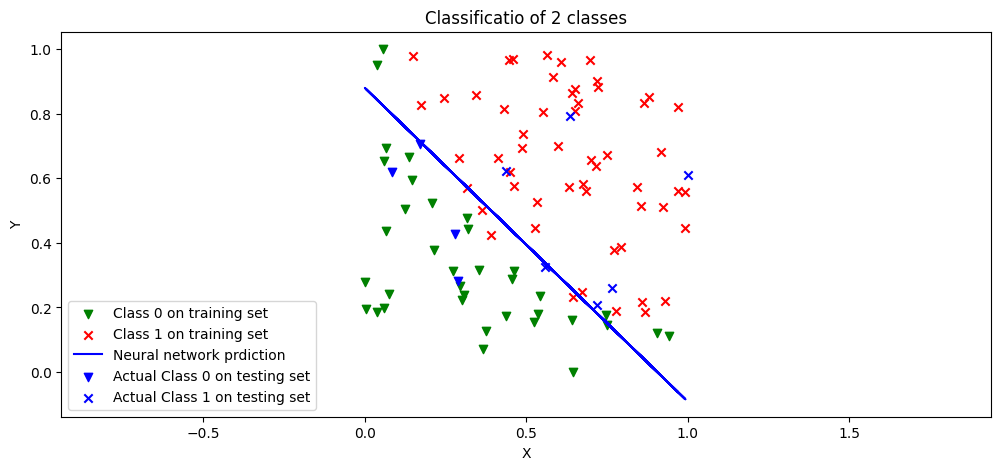

In [16]:
#plot results
df_training = pd.DataFrame({"X":x_train[:,0],"Y":x_train[:,1],'Label':y_train})
df_testing = pd.DataFrame({"X":x_test[:,0],"Y":x_test[:,1],'Label':y_test})

group0 = df_training[df_training['Label']==0]
group1 = df_training[df_training['Label']==1]
group0_test = df_testing[df_testing['Label']==0]
group1_test = df_testing[df_testing['Label']==1]

plt.figure(figsize=(12,5))
plt.title("Classificatio of 2 classes")
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.scatter(group0['X'],group0['Y'],marker='v',c='g',label='Class 0 on training set')
plt.scatter(group1['X'],group1['Y'],marker='x',c='r',label='Class 1 on training set')
plt.legend(loc='upper right')
plt.plot(df_training['X'].values,(theta0+theta1*df_training['X'].values)/((-1)*theta2),'-b',label="Neural network prdiction")
plt.scatter(group0_test['X'],group0_test['Y'],marker='v',c='b',label='Actual Class 0 on testing set')
plt.scatter(group1_test['X'],group1_test['Y'],marker='x',c='b',label='Actual Class 1 on testing set')
plt.legend(loc="lower left")
plt.show()


613/613 [==============================] - 1s 1ms/step


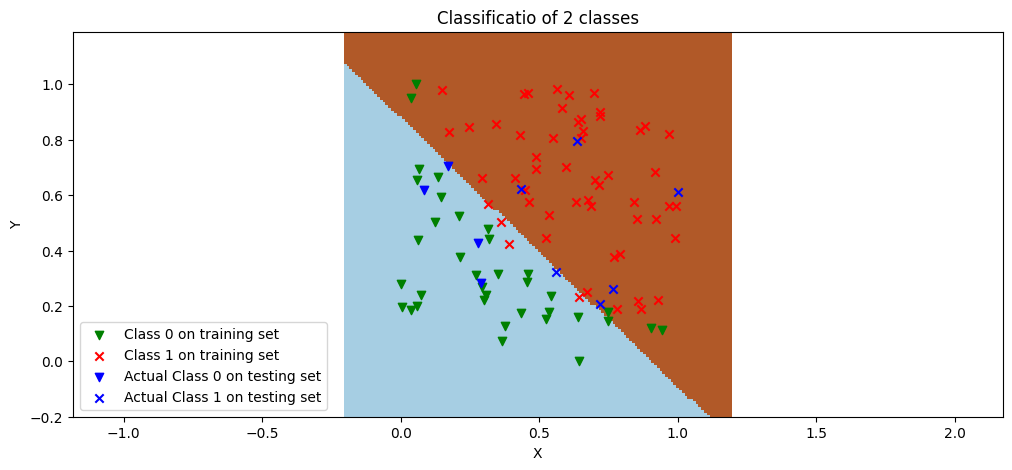

In [17]:
#plot results
df_training = pd.DataFrame({"X":x_train[:,0],"Y":x_train[:,1],'Label':y_train})
df_testing = pd.DataFrame({"X":x_test[:,0],"Y":x_test[:,1],'Label':y_test})

group0 = df_training[df_training['Label']==0]
group1 = df_training[df_training['Label']==1]
group0_test = df_testing[df_testing['Label']==0]
group1_test = df_testing[df_testing['Label']==1]

plt.figure(1,figsize=(12,5))
plt.title("Classificatio of 2 classes")
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')

x_min,x_max = -0.2,1.2
y_min,y_max = -0.2,1.2
h = 0.01
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
Z = (modelNN_logistic.predict(np.c_[xx.ravel(),yy.ravel()])>0.5).astype('int32')

Z = Z.reshape(xx.shape)
# plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())

plt.scatter(group0['X'],group0['Y'],marker='v',c='g',label='Class 0 on training set')
plt.scatter(group1['X'],group1['Y'],marker='x',c='r',label='Class 1 on training set')
plt.legend(loc='upper right')
#plt.plot(df_training['X'].values,(model_logistic.intercept_[0]+model_logistic.coef_[0][0]*df_training['X'].values)/((-1)*model_logistic.coef_[0][1]),'-b',label="Logistic regression prdiction")
plt.scatter(group0_test['X'],group0_test['Y'],marker='v',c='b',label='Actual Class 0 on testing set')
plt.scatter(group1_test['X'],group1_test['Y'],marker='x',c='b',label='Actual Class 1 on testing set')
plt.legend(loc="lower left")
plt.show()

613/613 [==============================] - 1s 1ms/step


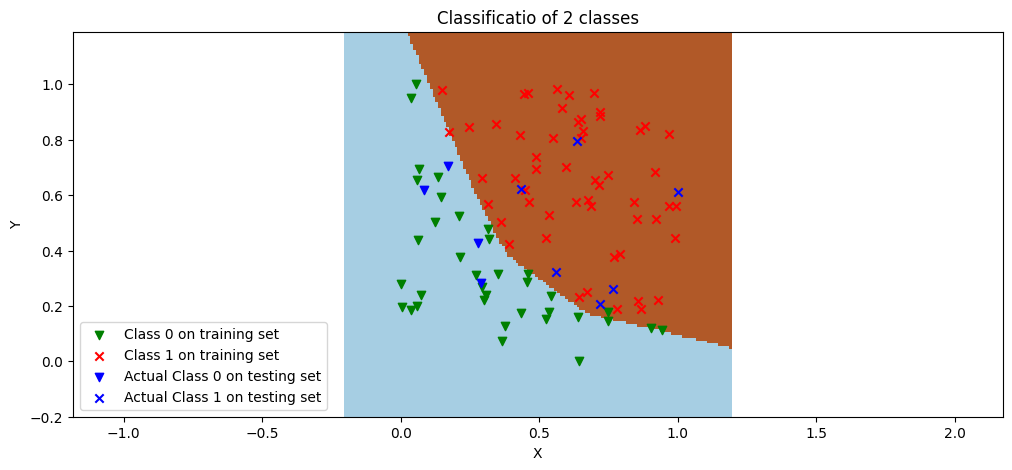

In [18]:
#plot results
df_training = pd.DataFrame({"X":x_train[:,0],"Y":x_train[:,1],'Label':y_train})
df_testing = pd.DataFrame({"X":x_test[:,0],"Y":x_test[:,1],'Label':y_test})

group0 = df_training[df_training['Label']==0]
group1 = df_training[df_training['Label']==1]
group0_test = df_testing[df_testing['Label']==0]
group1_test = df_testing[df_testing['Label']==1]

plt.figure(1,figsize=(12,5))
plt.title("Classificatio of 2 classes")
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')

x_min,x_max = -0.2,1.2
y_min,y_max = -0.2,1.2
h = 0.01
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
Z = (modelNN.predict(np.c_[xx.ravel(),yy.ravel()])>0.5).astype('int32')

Z = Z.reshape(xx.shape)
# plt.figure()
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())

plt.scatter(group0['X'],group0['Y'],marker='v',c='g',label='Class 0 on training set')
plt.scatter(group1['X'],group1['Y'],marker='x',c='r',label='Class 1 on training set')
plt.legend(loc='upper right')
#plt.plot(df_training['X'].values,(model_logistic.intercept_[0]+model_logistic.coef_[0][0]*df_training['X'].values)/((-1)*model_logistic.coef_[0][1]),'-b',label="Logistic regression prdiction")
plt.scatter(group0_test['X'],group0_test['Y'],marker='v',c='b',label='Actual Class 0 on testing set')
plt.scatter(group1_test['X'],group1_test['Y'],marker='x',c='b',label='Actual Class 1 on testing set')
plt.legend(loc="lower left")
plt.show()

In [19]:
#Predict on training set
y_pred0 =  (modelNN_logistic.predict(x_train)>0.5).astype('int32')
y_pred1 =  (modelNN.predict(x_train)>0.5).astype('int32')

3/3 [==============================] - 0s 1ms/step


In [20]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report of Neural network-logistic model\n=======================")
print(classification_report(y_true=y_train, y_pred=y_pred0))
print("Confusion matrix of Neural network-logistic model\n=======================")
print(confusion_matrix(y_true=y_train, y_pred=y_pred0))

Classification report of Neural network-logistic model
              precision    recall  f1-score   support

           0       0.89      0.86      0.87        36
           1       0.91      0.93      0.92        54

    accuracy                           0.90        90
   macro avg       0.90      0.89      0.90        90
weighted avg       0.90      0.90      0.90        90

Confusion matrix of Neural network-logistic model
[[31  5]
 [ 4 50]]


In [21]:
print("Classification report of Neural network model\n=======================")
print(classification_report(y_true=y_train, y_pred=y_pred1))
print("Confusion matrix of Neural network model\n=======================")
print(confusion_matrix(y_true=y_train, y_pred=y_pred1))

Classification report of Neural network model
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        36
           1       0.95      0.98      0.96        54

    accuracy                           0.96        90
   macro avg       0.96      0.95      0.95        90
weighted avg       0.96      0.96      0.96        90

Confusion matrix of Neural network model
[[33  3]
 [ 1 53]]


In [22]:
# Compute confusion matrix
import itertools
def plot_confusion_matrix(cm, classes,title='Confusion matrix',cmap=plt.cm.Blues):
  
  plt.figure(figsize=(5,5))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  
  fmt = 'd' 
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  

<Figure size 640x480 with 0 Axes>

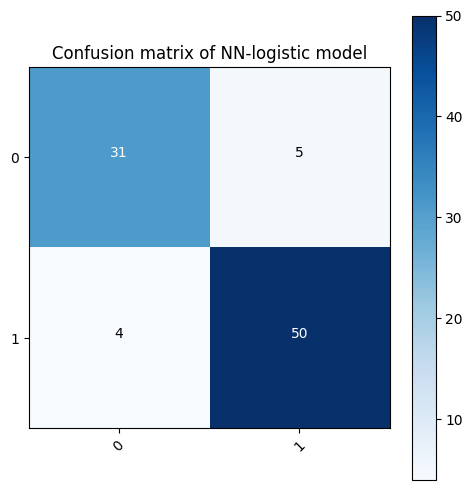

<Figure size 640x480 with 0 Axes>

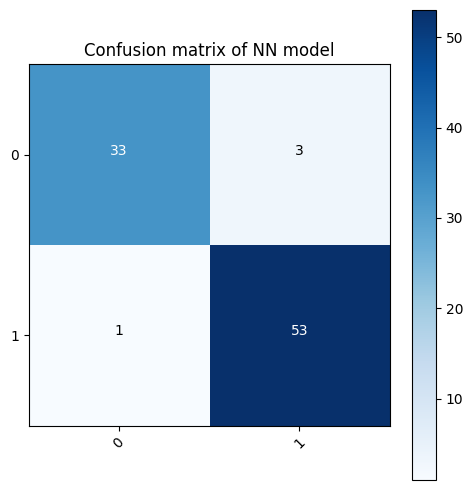

In [23]:
class_names = list(set(y_train))
#Confusion matrix of Neural network-logistic model
cnf_matrix = confusion_matrix(y_true=y_train, y_pred=y_pred0)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix of NN-logistic model')
#Confusion matrix of Neural network model
cnf_matrix = confusion_matrix(y_true=y_train, y_pred=y_pred1)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix of NN model')

In [24]:
#Predictions on the test set
y_pred0 =  (modelNN_logistic.predict(x_test)>0.5).astype('int32')
y_pred1 =  (modelNN.predict(x_test)>0.5).astype('int32')

1/1 [==============================] - 0s 19ms/step


In [25]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report of Neural network-logistic model\n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred0))
print("Confusion matrix of Neural network-logistic model\n=======================")
print(confusion_matrix(y_true=y_test, y_pred=y_pred0))

Classification report of Neural network-logistic model
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.83      0.91         6

    accuracy                           0.90        10
   macro avg       0.90      0.92      0.90        10
weighted avg       0.92      0.90      0.90        10

Confusion matrix of Neural network-logistic model
[[4 0]
 [1 5]]


In [26]:
print("Classification report of Neural network model\n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred1))
print("Confusion matrix of Neural network model\n=======================")
print(confusion_matrix(y_true=y_test, y_pred=y_pred1))

Classification report of Neural network model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Confusion matrix of Neural network model
[[4 0]
 [0 6]]


<Figure size 640x480 with 0 Axes>

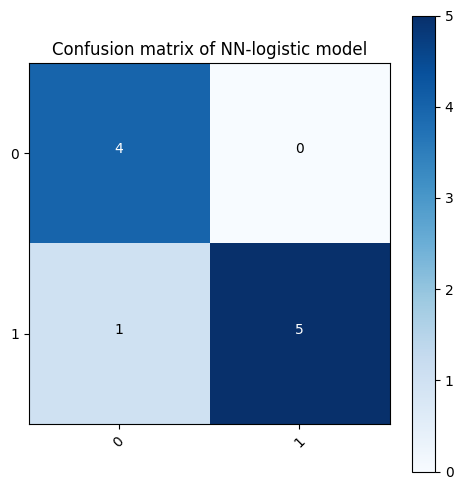

<Figure size 640x480 with 0 Axes>

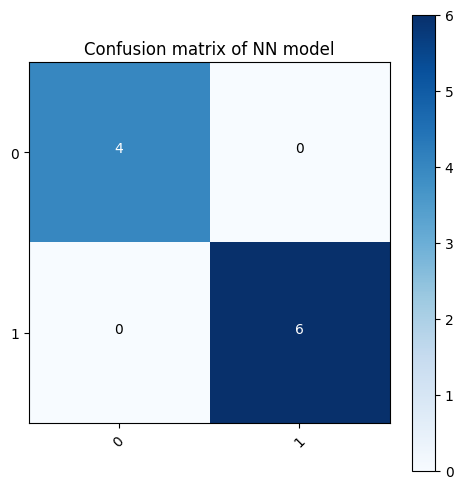

In [27]:
class_names = list(set(y_test))
#Confusion matrix of Neural network-logistic model
cnf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred0)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix of NN-logistic model')
#Confusion matrix of Neural network model
cnf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred1)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix of NN model')